## https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

import polars.selectors as cs
from pandas.core.common import random_state

In [2]:
df_path = r'F:\DataSpell\scikit-learn_training\DATA\Electronic_sales_Sep2023-Sep2024.csv'

In [3]:
df = pl.read_csv(df_path)

In [4]:
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64
1000,53,"""Male""","""No""","""Smartphone""","""SKU1004""",2,"""Cancelled""","""Credit Card""",5538.33,791.19,7,"""2024-03-20""","""Standard""","""Accessory,Accessory,Accessory""",40.21
1000,53,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",741.09,247.03,3,"""2024-04-20""","""Overnight""","""Impulse Item""",26.09
1002,41,"""Male""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Credit Card""",1855.84,463.96,4,"""2023-10-17""","""Express""",null,0.0
1002,41,"""Male""","""Yes""","""Smartphone""","""SKU1004""",2,"""Completed""","""Cash""",3164.76,791.19,4,"""2024-08-09""","""Overnight""","""Impulse Item,Impulse Item""",60.16
1003,75,"""Male""","""Yes""","""Smartphone""","""SKU1001""",5,"""Completed""","""Cash""",41.5,20.75,2,"""2024-05-21""","""Express""","""Accessory""",35.56
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
19996,27,"""Female""","""No""","""Smartphone""","""SMP234""",4,"""Completed""","""Bank Transfer""",6838.08,1139.68,6,"""2024-06-15""","""Expedited""",null,0.0
19996,27,"""Female""","""Yes""","""Laptop""","""LTP123""",4,"""Cancelled""","""Credit Card""",2697.28,674.32,4,"""2024-07-18""","""Standard""",null,0.0
19996,27,"""Female""","""No""","""Headphones""","""HDP456""",4,"""Completed""","""Bank Transfer""",1805.9,361.18,5,"""2024-08-26""","""Standard""","""Impulse Item, Extended Warrant…",198.98


In [5]:
most_frequent_value = df.select(
    pl.col('Add-ons Purchased').mode()
).item()


In [6]:
df = df.with_columns(
    pl.col('Add-ons Purchased').fill_null(most_frequent_value, strategy='max')
)


In [7]:
null_count = df.select(
    pl.col('Add-ons Purchased').null_count()
).item()

print(f"Null values after imputation: {null_count}")

Null values after imputation: 0


# Feature Scaling: Apply normalization and standardization techniques to numerical features. Use histograms to visualize the effect before and after scaling.

In [8]:
df = df.with_columns(
    pl.col('Customer ID').cast(pl.String),
    pl.col('Rating').cast(pl.String),
    
)

In [9]:
numeric_columns = df.select(
    # cs.by_dtype(pl.Int8, pl.Int16, pl.Int32, pl.Int64, pl.Float32, pl.Float64)
    cs.by_dtype(cs.INTEGER_DTYPES, cs.FLOAT_DTYPES)
).columns

numeric_columns

['Age', 'Total Price', 'Unit Price', 'Quantity', 'Add-on Total']

In [10]:
df_original = df[numeric_columns]

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [12]:
min_max_scaler = MinMaxScaler()

In [13]:
df_normalized = min_max_scaler.fit_transform(df[numeric_columns])

In [14]:
df_normalized

array([[0.56451613, 0.48501721, 0.68855067, 0.66666667, 0.13734331],
       [0.56451613, 0.06332075, 0.20222892, 0.22222222, 0.08911432],
       [0.37096774, 0.1613117 , 0.39610163, 0.33333333, 0.        ],
       ...,
       [0.14516129, 0.15692178, 0.30424602, 0.44444444, 0.67964614],
       [0.14516129, 0.22042009, 0.30424602, 0.66666667, 0.34614202],
       [0.14516129, 0.0574514 , 0.58410267, 0.        , 0.        ]])

In [15]:
standard_scaler = StandardScaler()

In [16]:
df_standardized = standard_scaler.fit_transform(df[numeric_columns])

In [17]:
df_standardized

array([[ 0.22207754,  0.92663077,  0.68069514,  0.52753913, -0.37953831],
       [ 0.22207754, -0.95839876, -1.06192023, -0.86580929, -0.62274766],
       [-0.44317383, -0.52036842, -0.36722464, -0.51747218, -1.07213377],
       ...,
       [-1.21930042, -0.53999186, -0.69636681, -0.16913508,  2.35518888],
       [-1.21930042, -0.25614742, -0.69636681,  0.52753913,  0.6733928 ],
       [-1.21930042, -0.98463539,  0.30643122, -1.56248349, -1.07213377]])

In [18]:
df_normalized = pl.DataFrame(df_normalized, schema=numeric_columns)
df_standardized = pl.DataFrame(df_standardized, schema=numeric_columns)

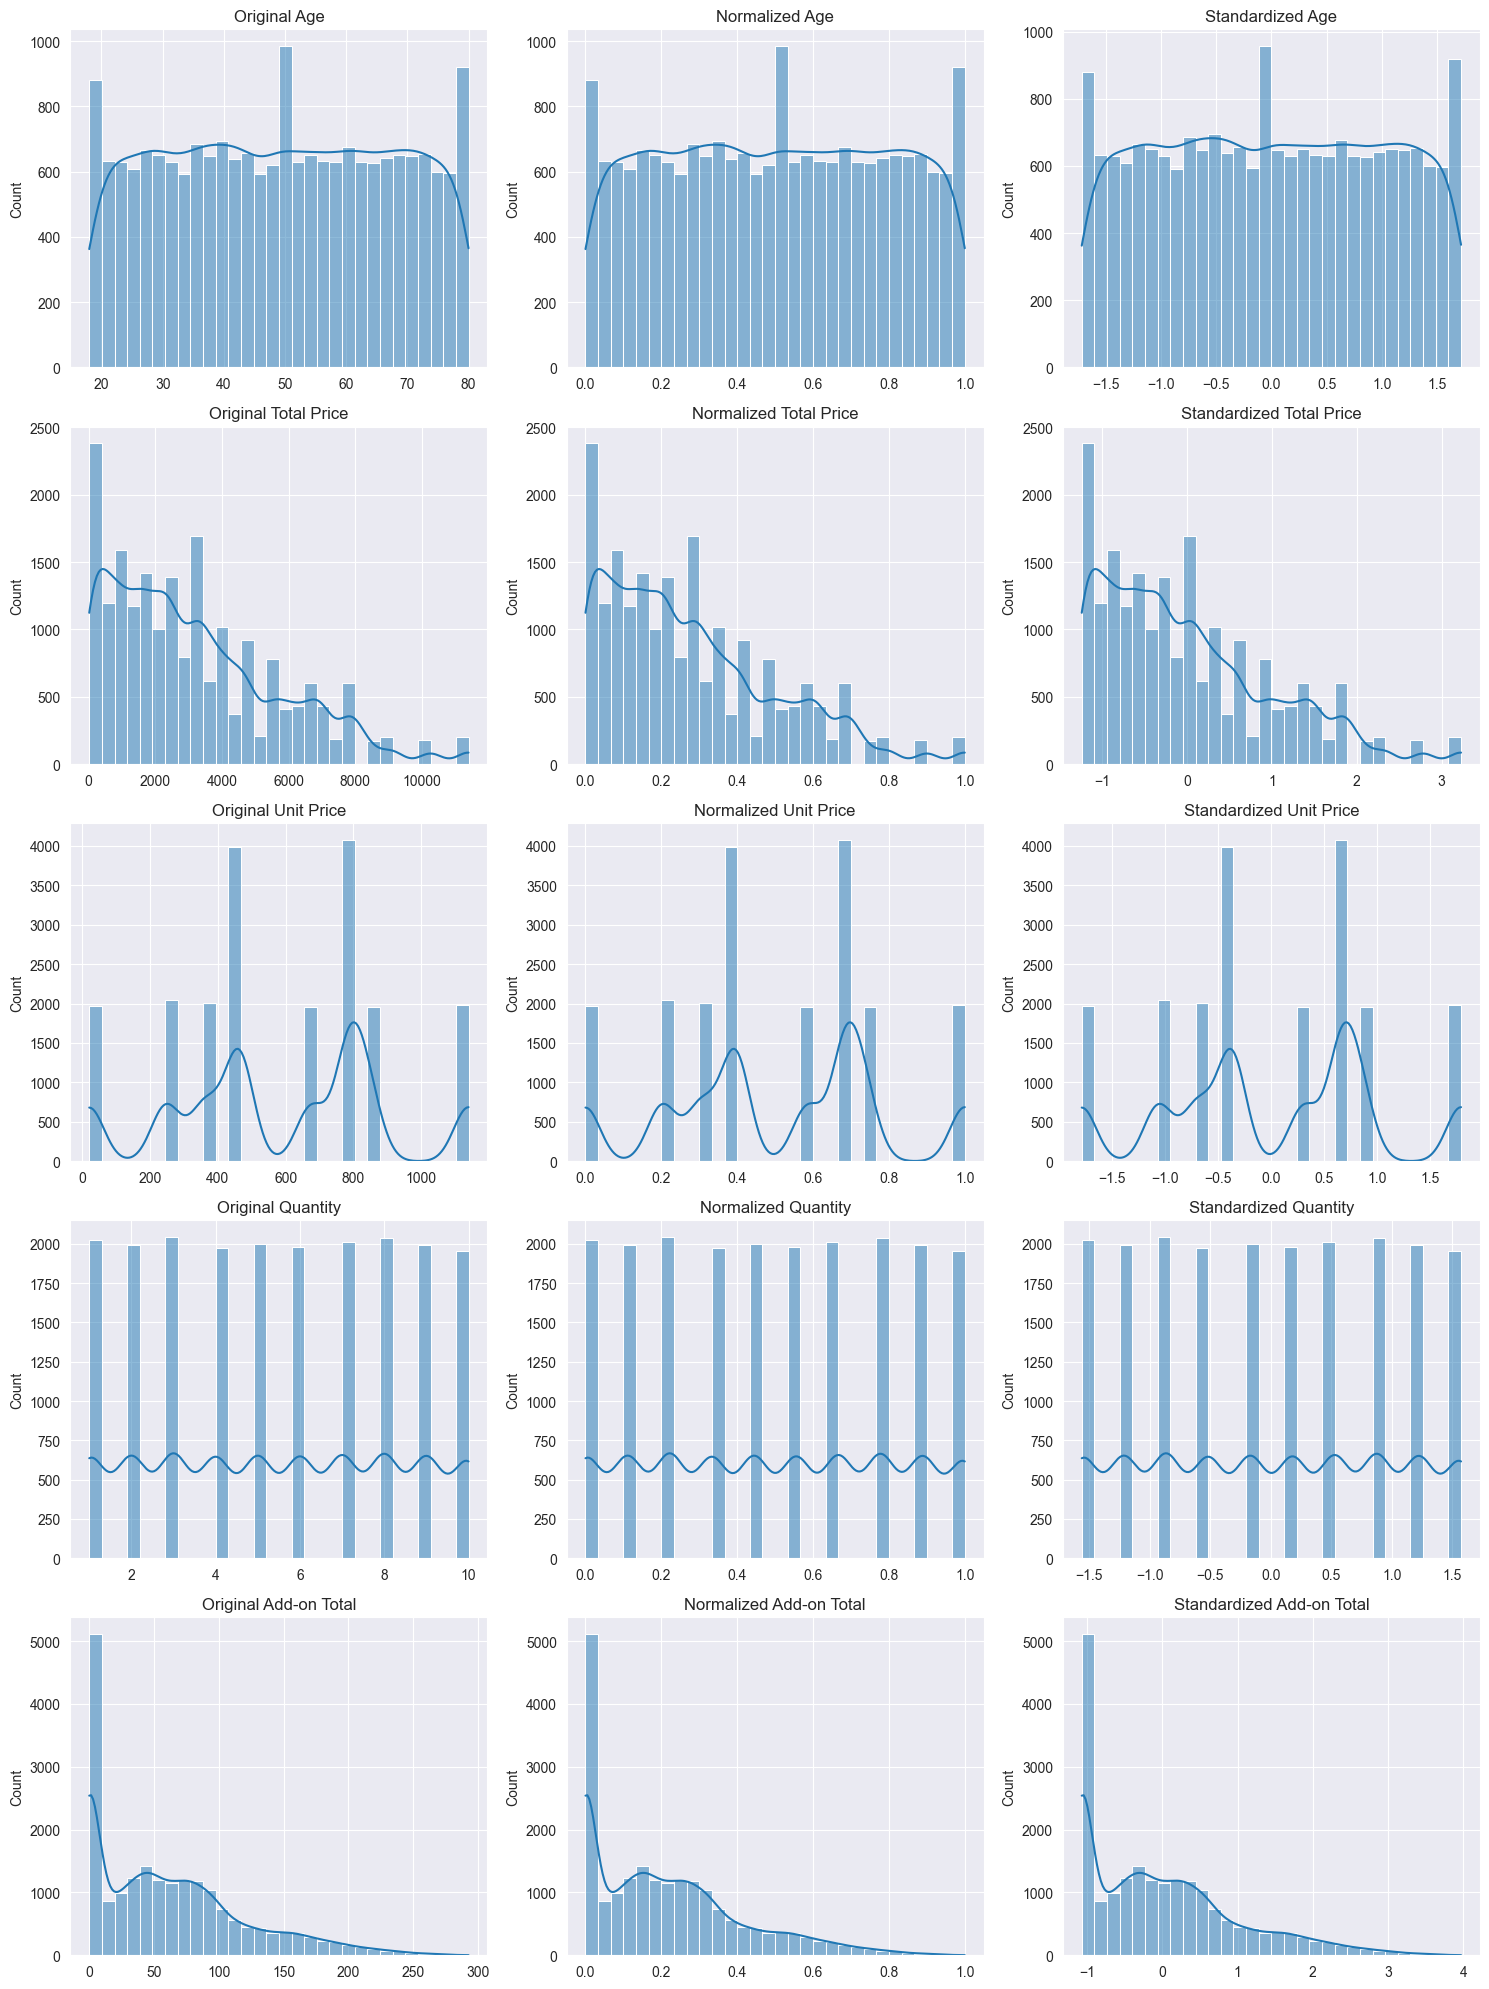

In [19]:
fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(15, len(numeric_columns) * 4))

for i, column in enumerate(numeric_columns):
    sns.histplot(df_original[column], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {column}")

    sns.histplot(df_normalized[column], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Normalized {column}")

    sns.histplot(df_standardized[column], bins=30, kde=True, ax=axes[i, 2])
    axes[i, 2].set_title(f"Standardized {column}")

plt.tight_layout()
plt.show()


# 3. Class Imbalance: Check for class imbalance in the 'Order Status' or 'Product Type' columns and visualize it using bar charts. Consider strategies like oversampling, undersampling, or SMOTE to balance classes.

In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

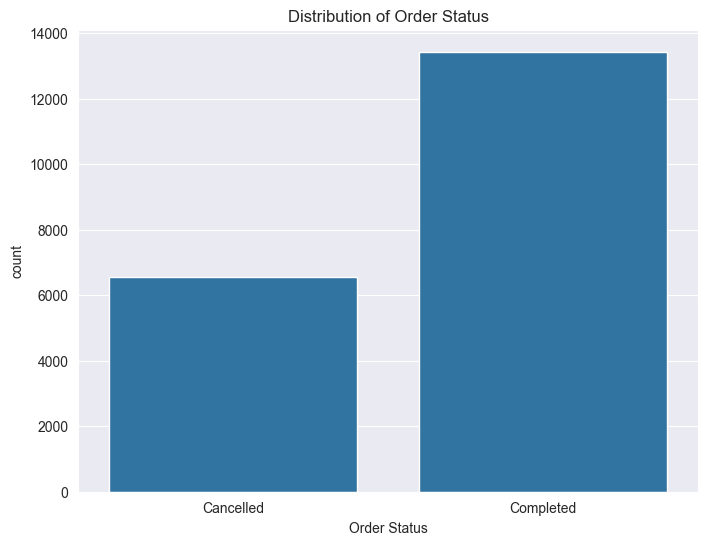

In [24]:
def visualize_class_distribution(df, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()
    
visualize_class_distribution(df, 'Order Status')

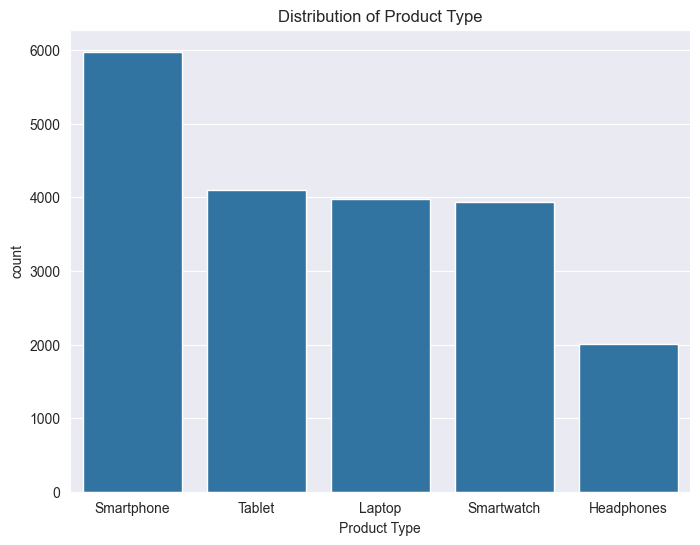

In [26]:
visualize_class_distribution(df, 'Product Type')

In [27]:
X = df.drop('Order Status')

In [28]:
y = df['Order Status']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
smote = SMOTE(random_state=42)

In [31]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'Male'